# 缺失值插补

#

# 双聚类算法

### Spectral Biclustering 算法


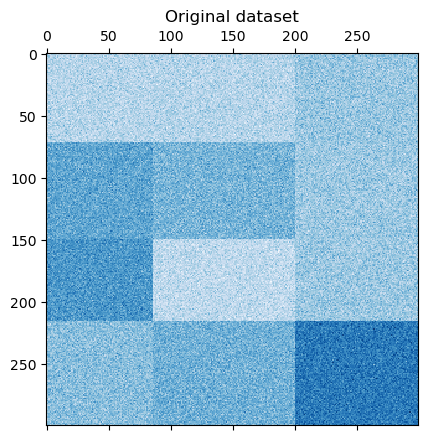

In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_checkerboard  #用于生成棋盘格模式的数据集，类似random，但可以指定形状、噪声和随机种子
n_clusters = (4, 3)
data, rows, columns = make_checkerboard(shape=(300, 300), n_clusters=n_clusters, noise=10, shuffle=False, random_state=42) #data为生成的数据，rows和columns为数据的行列数
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")
_ = plt.show()

d:\Anaconda_24\envs\all_can_cpu\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] 系统找不到指定的文件。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Anaconda_24\envs\all_can_cpu\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "d:\Anaconda_24\envs\all_can_cpu\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "d:\Anaconda_24\envs\all_can_cpu\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\Anaconda_24\envs\all_can_cpu\lib\subprocess.py", line 1436, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
d:\Anaconda_24\envs\all_can_cpu\lib\site-

consensus score: 1.000


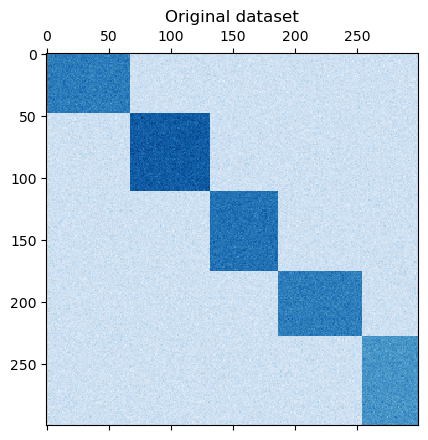

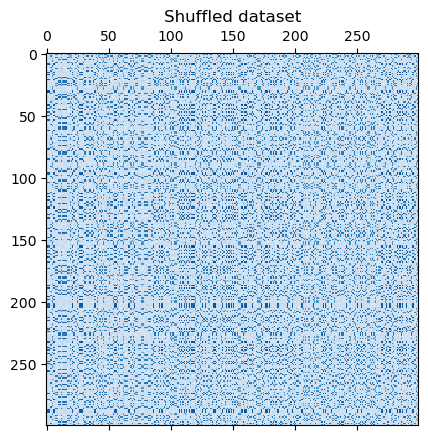

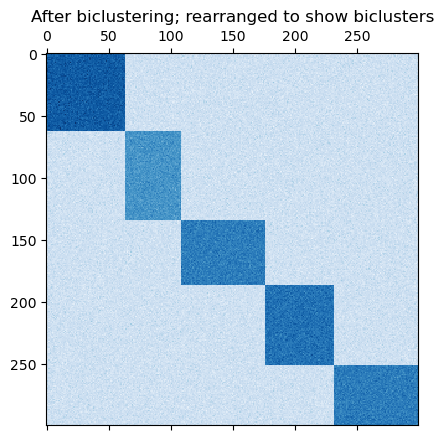

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralCoclustering
from sklearn.datasets import make_biclusters
from sklearn.metrics import consensus_score
data, rows, columns = make_biclusters(shape=(300, 300), n_clusters=5, noise=5, shuffle=False, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

# shuffle clusters
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_, (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()

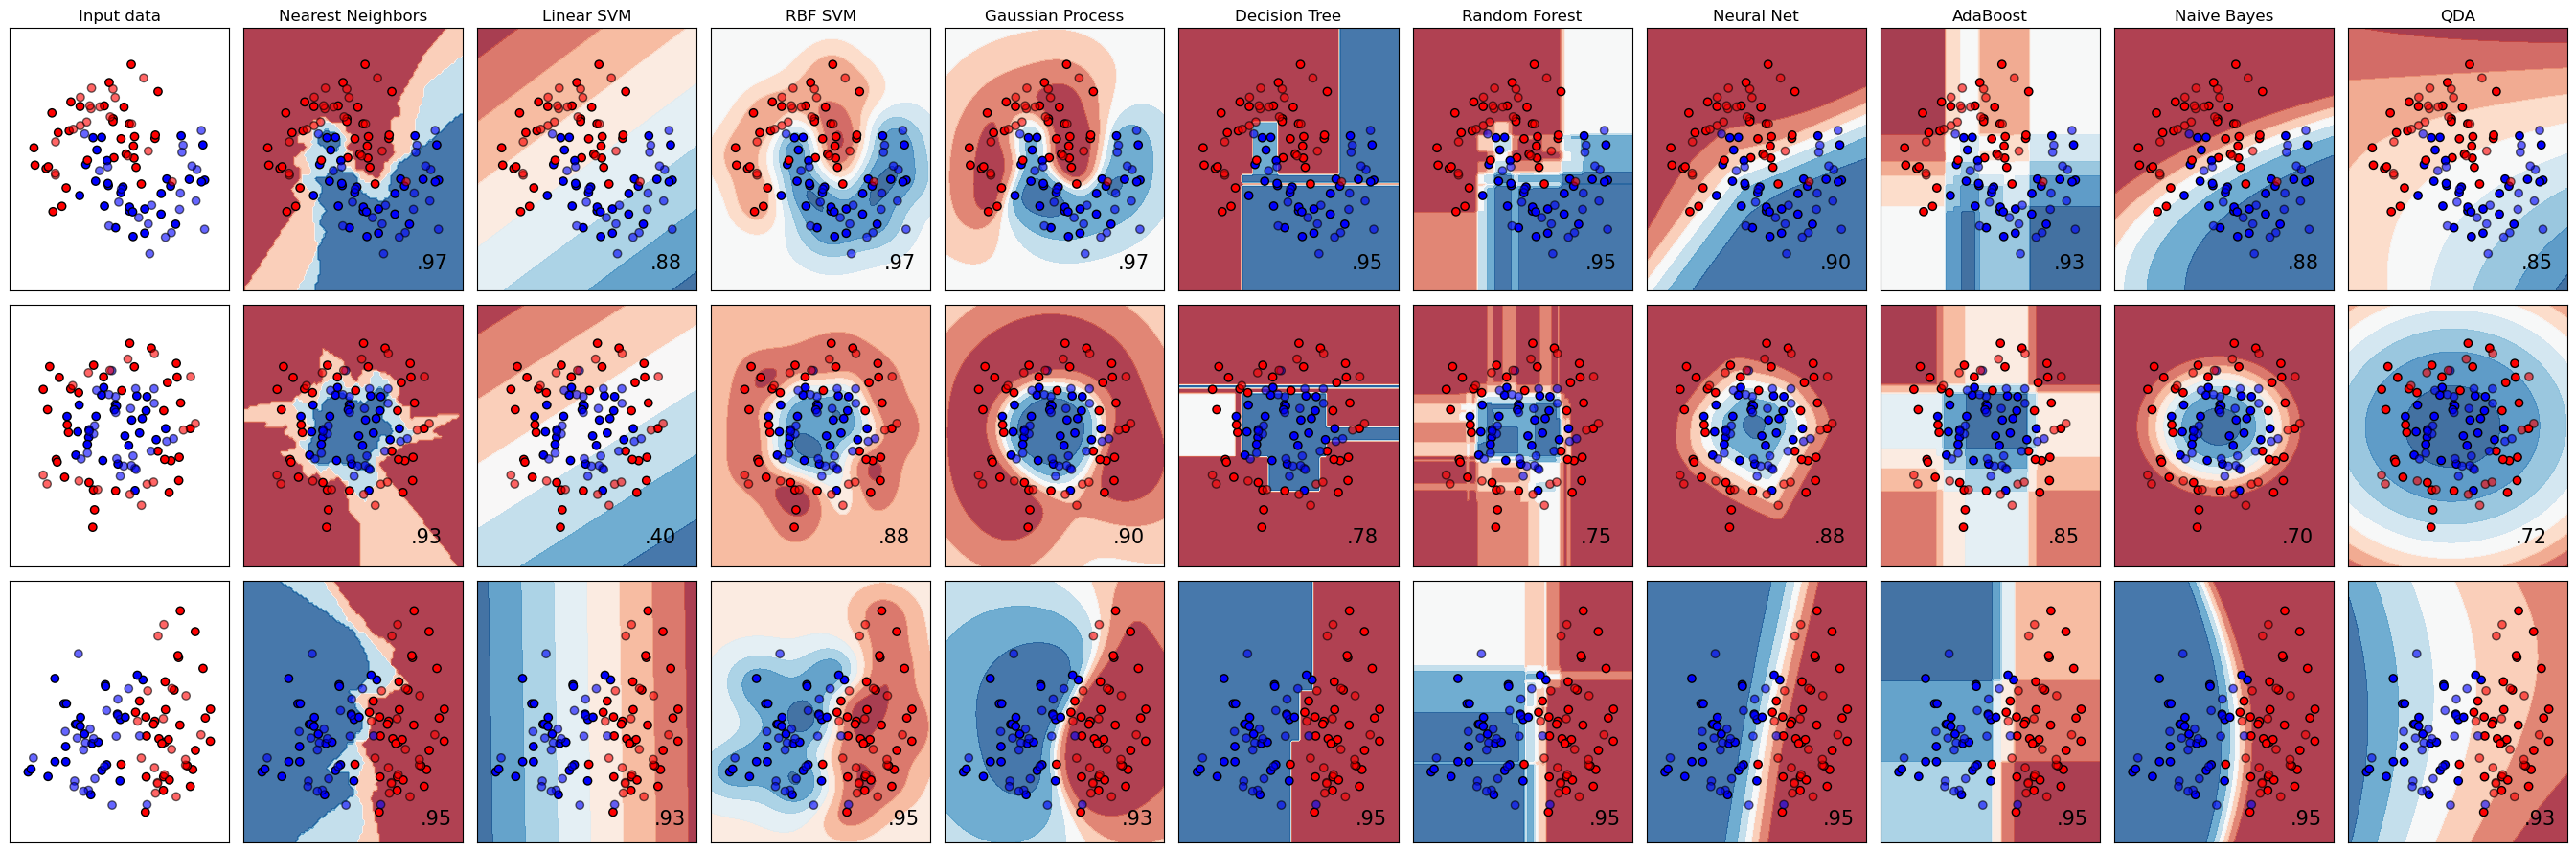

In [ ]:
# 作者：scikit-learn开发者
# 许可证标识符：BSD-3-Clause

import matplotlib.pyplot as plt  # 导入matplotlib绘图库
import numpy as np  # 导入numpy数值计算库
from matplotlib.colors import ListedColormap  # 从matplotlib导入自定义颜色映射

from sklearn.datasets import make_circles, make_classification, make_moons  # 从sklearn导入数据集生成函数
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # 导入二次判别分析
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier  # 导入集成学习算法
from sklearn.gaussian_process import GaussianProcessClassifier  # 导入高斯过程分类器
from sklearn.gaussian_process.kernels import RBF  # 导入径向基函数核
from sklearn.inspection import DecisionBoundaryDisplay  # 导入决策边界显示工具
from sklearn.model_selection import train_test_split  # 导入训练测试集分割函数
from sklearn.naive_bayes import GaussianNB  # 导入高斯朴素贝叶斯
from sklearn.neighbors import KNeighborsClassifier  # 导入K近邻分类器
from sklearn.neural_network import MLPClassifier  # 导入多层感知器分类器
from sklearn.pipeline import make_pipeline  # 导入管道构建工具
from sklearn.preprocessing import StandardScaler  # 导入数据标准化处理器
from sklearn.svm import SVC  # 导入支持向量机分类器
from sklearn.tree import DecisionTreeClassifier  # 导入决策树分类器

names = [  # 定义分类器名称列表
    "Nearest Neighbors",  # 最近邻算法
    "Linear SVM",  # 线性支持向量机
    "RBF SVM",  # 径向基函数支持向量机
    "Gaussian Process",  # 高斯过程
    "Decision Tree",  # 决策树
    "Random Forest",  # 随机森林
    "Neural Net",  # 神经网络
    "AdaBoost",  # 自适应提升算法
    "Naive Bayes",  # 朴素贝叶斯
    "QDA",  # 二次判别分析
]

classifiers = [  # 定义分类器实例列表
    KNeighborsClassifier(3),  # K近邻分类器，k=3
    SVC(kernel="linear", C=0.025, random_state=42),  # 线性核SVM，C=0.025
    SVC(gamma=2, C=1, random_state=42),  # RBF核SVM，gamma=2，C=1
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),  # 高斯过程分类器，使用RBF核
    DecisionTreeClassifier(max_depth=5, random_state=42),  # 决策树，最大深度为5
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42  # 随机森林，最大深度5，10棵树，1个特征
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),  # 神经网络，正则化参数1，最大迭代1000次
    AdaBoostClassifier(random_state=42),  # AdaBoost分类器
    GaussianNB(),  # 高斯朴素贝叶斯
    QuadraticDiscriminantAnalysis(),  # 二次判别分析
]

X, y = make_classification(  # 生成分类数据集
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1  # 2个特征，0个冗余特征，2个信息特征，每类1个簇
)
rng = np.random.RandomState(2)  # 创建随机数生成器，种子为2
X += 2 * rng.uniform(size=X.shape)  # 向数据添加随机噪声
linearly_separable = (X, y)  # 创建线性可分数据集元组

datasets = [  # 定义数据集列表
    make_moons(noise=0.3, random_state=0),  # 月牙形数据集，噪声0.3
    make_circles(noise=0.2, factor=0.5, random_state=1),  # 同心圆数据集，噪声0.2，内外圆比例0.5
    linearly_separable,  # 线性可分数据集
]

figure = plt.figure(figsize=(27, 9))  # 创建图形窗口，尺寸27x9英寸
i = 1  # 初始化子图计数器
# 遍历数据集
for ds_cnt, ds in enumerate(datasets):  # 枚举遍历数据集，ds_cnt为索引，ds为数据集
    # preprocess dataset, split into training and test part  # 预处理数据集，分割为训练集和测试集
    X, y = ds  # 解包数据集为特征X和标签y
    X_train, X_test, y_train, y_test = train_test_split(  # 分割数据集
        X, y, test_size=0.4, random_state=42  # 测试集占40%，随机种子42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  # 计算x轴显示范围
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  # 计算y轴显示范围

# 首先绘制数据集
    cm = plt.cm.RdBu  # 设置颜色映射为红蓝渐变
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])  # 创建红蓝二色映射
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)  # 创建子图
    if ds_cnt == 0:  # 如果是第一个数据集
        ax.set_title("Input data")  # 设置标题为"输入数据"
    # Plot the training points  # 绘制训练点
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")  # 散点图显示训练数据
    # Plot the testing points  # 绘制测试点
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"  # 散点图显示测试数据，透明度0.6
    )
    ax.set_xlim(x_min, x_max)  # 设置x轴范围
    ax.set_ylim(y_min, y_max)  # 设置y轴范围
    ax.set_xticks(())  # 移除x轴刻度
    ax.set_yticks(())  # 移除y轴刻度
    i += 1  # 子图计数器加1
    # 遍历分类器
    for name, clf in zip(names, classifiers):  # 同时遍历分类器名称和实例
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)  # 创建子图

        clf = make_pipeline(StandardScaler(), clf)  # 创建包含标准化的管道
        clf.fit(X_train, y_train)  # 训练分类器
        score = clf.score(X_test, y_test)  # 计算测试集准确率
        DecisionBoundaryDisplay.from_estimator(  # 显示决策边界
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5  # 在当前子图上绘制决策边界
        )

        # Plot the training points  # 绘制训练点
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"  # 训练数据散点图
        )
        # Plot the testing points  # 绘制测试点
        ax.scatter(
            X_test[:, 0],  # 测试集x坐标
            X_test[:, 1],  # 测试集y坐标
            c=y_test,  # 测试集标签颜色
            cmap=cm_bright,  # 颜色映射
            edgecolors="k",  # 边界颜色为黑色
            alpha=0.6,  # 透明度0.6
        )

        ax.set_xlim(x_min, x_max)  # 设置x轴范围
        ax.set_ylim(y_min, y_max)  # 设置y轴范围
        ax.set_xticks(())  # 移除x轴刻度
        ax.set_yticks(())  # 移除y轴刻度
        if ds_cnt == 0:  # 如果是第一个数据集
            ax.set_title(name)  # 设置标题为分类器名称
        ax.text(  # 添加文本显示准确率
            x_max - 0.3,  # x坐标位置
            y_min + 0.3,  # y坐标位置
            ("%.2f" % score).lstrip("0"),  # 格式化准确率，移除前导0
            size=15,  # 字体大小15
            horizontalalignment="right",  # 右对齐
        )
        i += 1  # 子图计数器加1

plt.tight_layout()  # 自动调整子图布局
plt.show()  # 显示图形
